In [97]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
df = pd.read_csv('C:/data/diabetes.csv')

In [99]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

EDA

<AxesSubplot:title={'center':'Have diabetes(0=No, 1=Yes)'}, xlabel='Outcome', ylabel='count'>

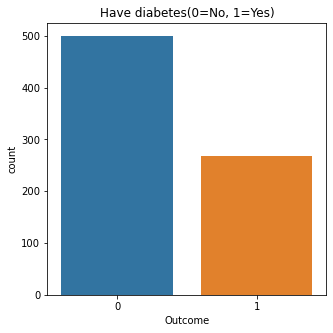

In [6]:
plt.figure(figsize=(5,5))
plt.title('Have diabetes(0=No, 1=Yes)')
sns.countplot(df['Outcome'])

In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

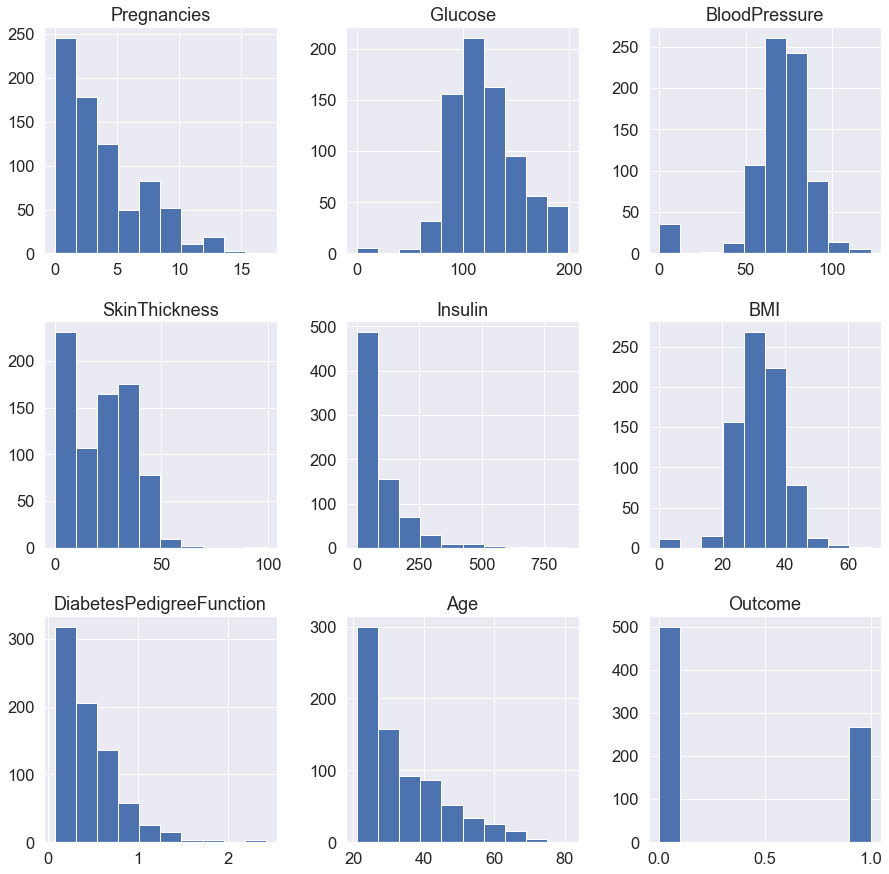

In [84]:
df.hist(figsize = (15,15))

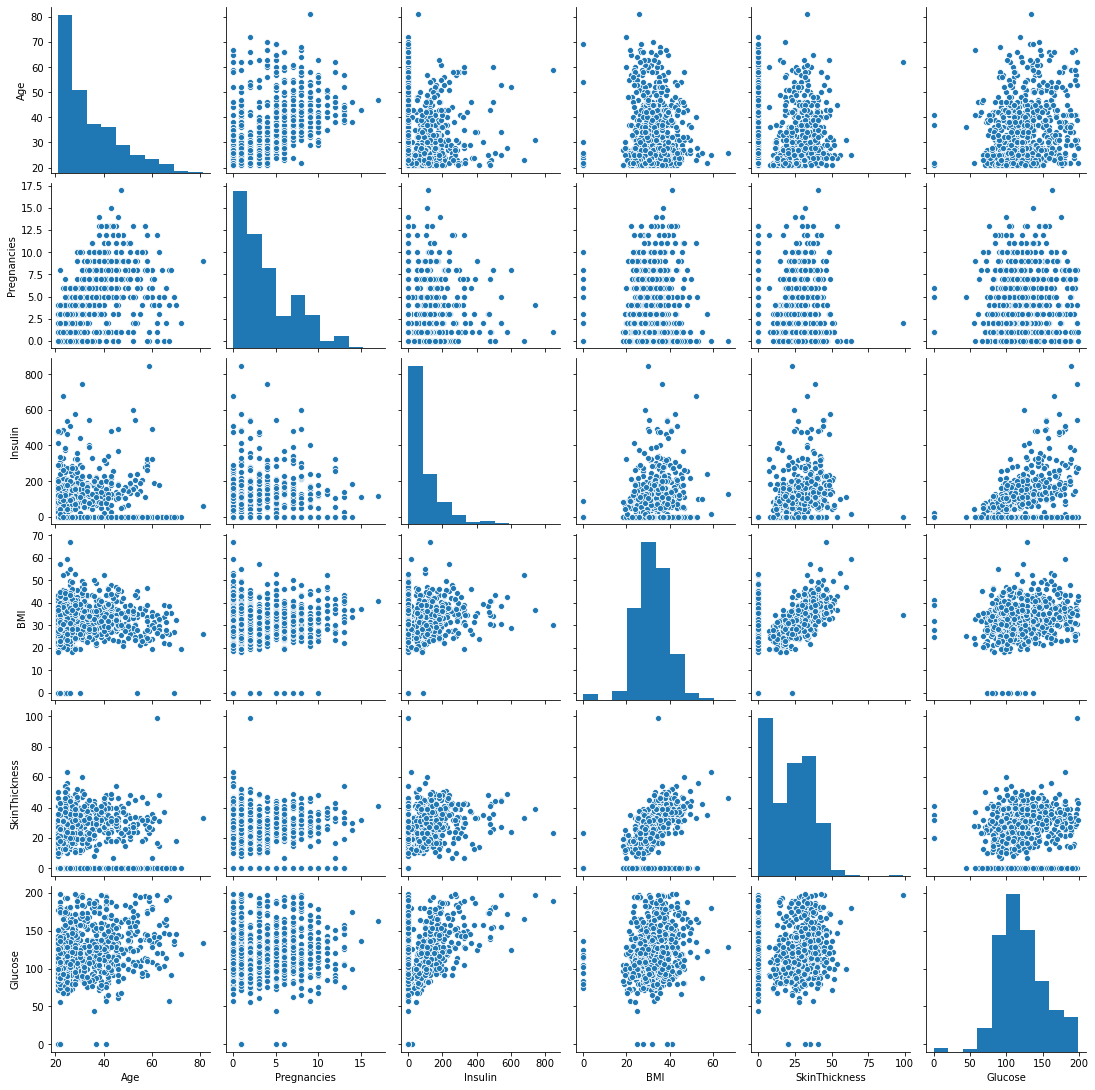

In [9]:
sns.pairplot(df[['Age','Pregnancies','Insulin','BMI','SkinThickness','Glucose']])

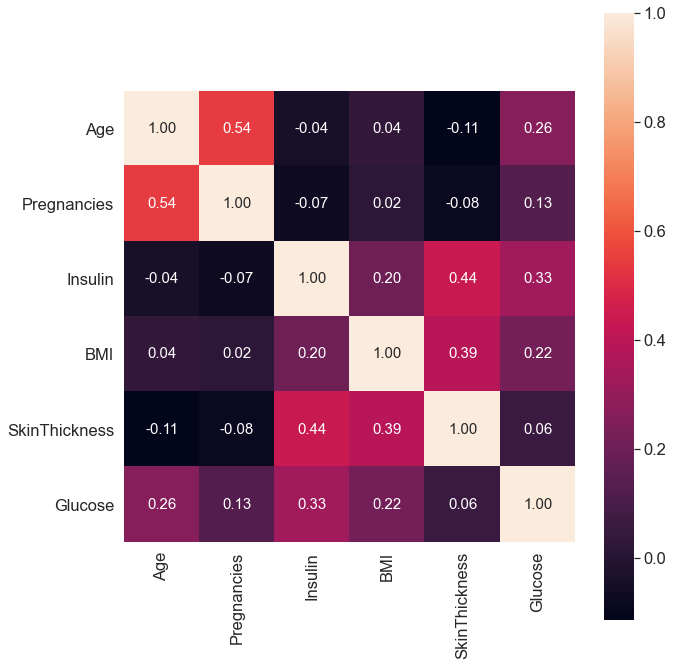

In [83]:
import numpy as np
cols=['Age','Pregnancies','Insulin','BMI','SkinThickness','Glucose']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.5)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt = '.2f', annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.tight_layout()
plt.show()

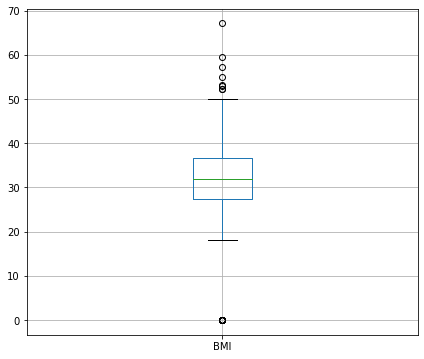

In [7]:
plt.figure(figsize=(7,6))
boxplot = df.boxplot(column=['BMI'])
plt.show()

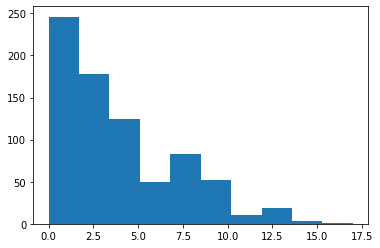

In [8]:
plt.hist(df['Pregnancies'])
plt.show()

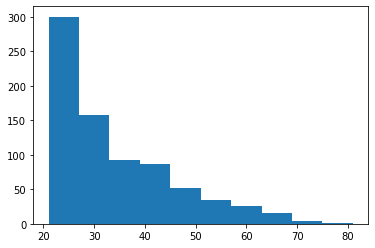

In [9]:
plt.hist(df['Age'])
plt.show()

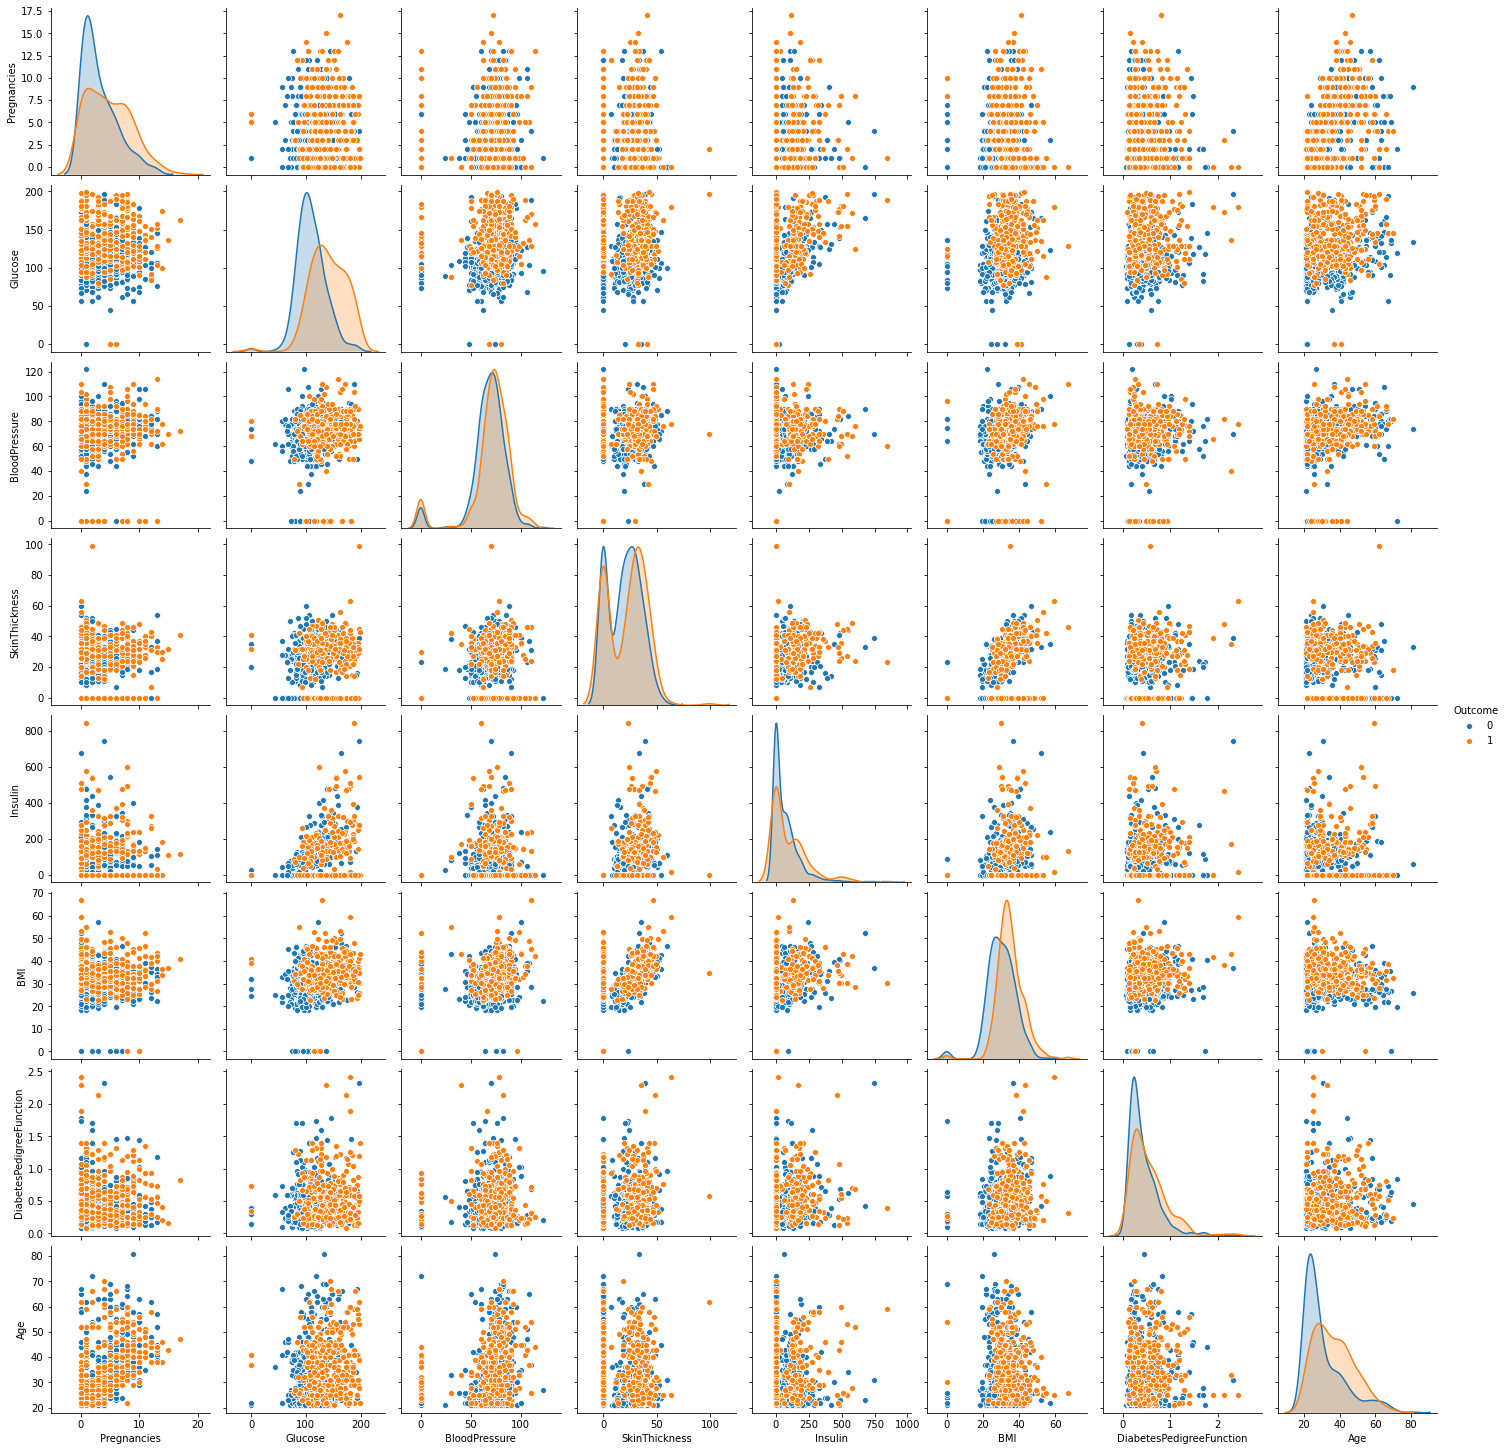

In [10]:
sns.pairplot(data=df,hue='Outcome',diag_kind='kde')
plt.show()

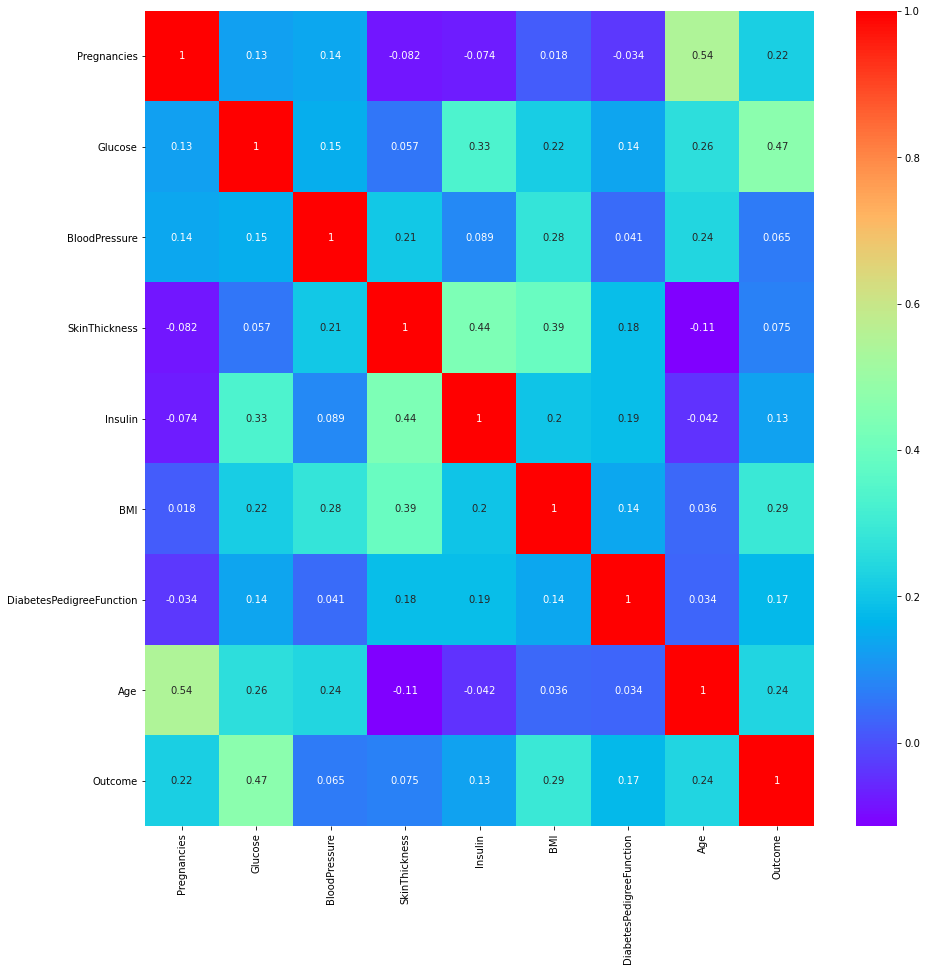

In [12]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.show()

In [100]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [101]:
from sklearn.model_selection import train_test_split
X,y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [102]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df.columns[:-1]

forest = RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [103]:
importances = forest.feature_importances_

 0)Glucose                        0.248542
 1)BMI                            0.153839
 2)Age                            0.152530
 3)DiabetesPedigreeFunction       0.125997
 4)BloodPressure                  0.095099
 5)Pregnancies                    0.082426
 6)SkinThickness                  0.072725
 7)Insulin                        0.068843


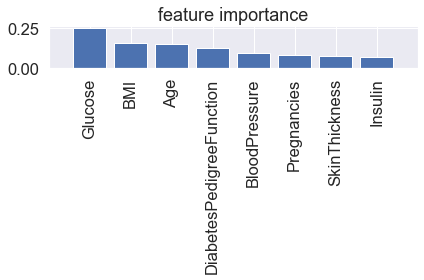

In [104]:
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print('%2d)%-*s %f'%(f*1, 30, feat_labels[indices[f]],importances[indices[f]]))
    
plt.title('feature importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()

plt.show()

로지스틱 회귀

In [105]:
from sklearn.model_selection import train_test_split
X,y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=0)

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
lr = LogisticRegression(solver='liblinear',multi_class='auto',
                        C=100.0,random_state=2)

In [54]:
lr = lr.fit(X_train, y_train)

In [55]:
score = lr.predict(X_train)

In [56]:
print("Training Score: ", lr.score(X_train, y_train))
print("Testing Score:  ", lr.score(X_test, y_test))

Training Score:  0.7801302931596091
Testing Score:   0.7792207792207793


In [57]:
# Model Accuracy
pred = lr.predict(X_test)
print("Model Accuracy is : ", pred)

Model Accuracy is :  [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0
 1 0 0 1 0 0]


In [58]:
lr.intercept_

array([-0.85231704])

In [59]:
lr.coef_

array([[ 0.39807346,  1.00211444, -0.23368416, -0.0357076 , -0.05217392,
         0.63623174,  0.31156759,  0.24294004]])

In [60]:
accuracy_score(y_test, pred)

0.7792207792207793

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.74      0.57      0.65        54

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154



PCA

In [107]:
from sklearn.model_selection import train_test_split
X,y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=0)

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [109]:
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\n고윳값 \n%s' % eigen_vals)


고윳값 
[2.04241039 1.71892202 1.07478574 0.42789489 0.43955938 0.68393485
 0.78361637 0.84380173]


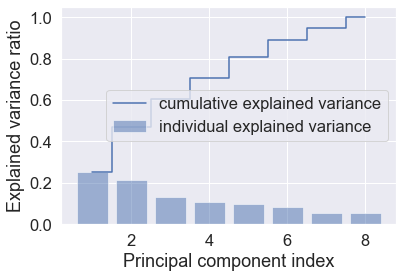

In [110]:
tot = sum(eigen_vals)
var_exp = [(i / tot ) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,9), var_exp, alpha=0.5, align='center',label = 'individual explained variance')
plt.step(range(1,9), cum_var_exp, where = 'mid',label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()


파이프라인

In [61]:
from sklearn.model_selection import train_test_split
X,y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)

In [63]:
#훈련 세트와 테스트 세트를 각각 학습하고 변환하는 단계를 구성하는 대신 standscaler,pca,logisticregression 객체를 하
#나의 파이프라인으로 연결

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(),
                       PCA(n_components=2),
                       LogisticRegression(solver='liblinear',random_state=1))



In [64]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression',
                 LogisticRegression(random_state=1, solver='liblinear'))])

In [65]:
pipe_lr.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [66]:
pipe_lr.score(X_test,y_test)

0.7316017316017316

그리드 서치를 사용한 하이퍼파라미터의최적화

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [43]:
#pipe_svc = make_pipeline(StandardScaler(),
   #                     SVC(random_state=1))
svc=SVC()
param_range = [0.0001, 0.001, 0.01, 0.1,
              1.0, 10.0 ,100.0, 1000.0]
param_grid = [{'svc__C':param_range,
              'svc_kernel':['linear']},
             {'svc__C': param_range,
             'svc__gamma': param_range,
             'svc__kernel': ['rbf']}]

gs = GridSearchCV(svc,
                 param_grid = param_grid,
                 scoring = 'accuracy',
                  cv=10,
                  n_jobs=-1)
                 

In [46]:
#최적의 파라미터를 찾는 법은 다 넣어보는 것이다

param = {
    'C': [0.0001, 0.001, 0.01, 0.1,
              1.0, 10.0 ,100.0, 1000.0],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

grid_svc = GridSearchCV(svc,param_grid=param,scoring='accuracy',cv=10)
#C: smv에서 소프트마진을 사용할때 어떻게 변화할 것인가
#gamma: kernel에 따라서 일종의 상수 값을 변동시킬 수 있다
#kernnel: linear, rbf가 존재
#c,gamma,kernnel을 리스트로 만들었는데 이를 어떤 식으로 활용할것이냐면 0.1-linear-0.1,0.1-linear-0.8..이런식으로 조합들을 모두 다해봄
#이를 위해 grid를 사용

In [47]:
grid_svc.fit(X_train_std, y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                               1000.0],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [48]:
grid_svc.best_params_

{'C': 1000.0, 'gamma': 0.1, 'kernel': 'linear'}

In [49]:
#최적의 조합으로 
svc2 = grid_svc.best_estimator_
svc2.fit(X_train,y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test,pred_svc2))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       100
           1       0.68      0.63      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

